<a href="https://colab.research.google.com/github/guiebitt/cddeeplearning/blob/master/exercicio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema

- Criar um modelo para previsão do preço das casas

# Etapa 01: Importação das bibliotecas

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.5.0'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Etapa 02: Importação dos dados

In [120]:
house_data = pd.read_csv('/kc-house-data.csv', encoding="ISO-8859-1")

In [121]:
# Visualizar os 10 primeiros registros
house_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [122]:
# Visualizar os 10 últimos registros
house_data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,3,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,3,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [123]:
# Resumo dos registros da tabela
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [124]:
# Informações da tabela
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Etapa 03: Limpeza da base de dados

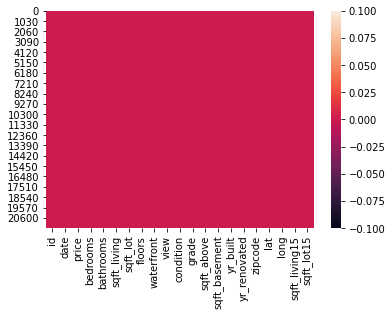

In [125]:
# Verifica se há dados nulos
sns.heatmap(house_data.isnull());

In [126]:
# Remove coluna "id" e "date" que não vai colaborar para o modelo
#house_data = house_data.drop(labels=["id", "date"], axis=1)

# Remove colunas "id", "zipcode", "lat", "long" e "date"
house_data = house_data.drop(labels=["id", "zipcode", "lat", "long", "date"], axis=1)

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503


# Etapa 04: Visualização da base de dados

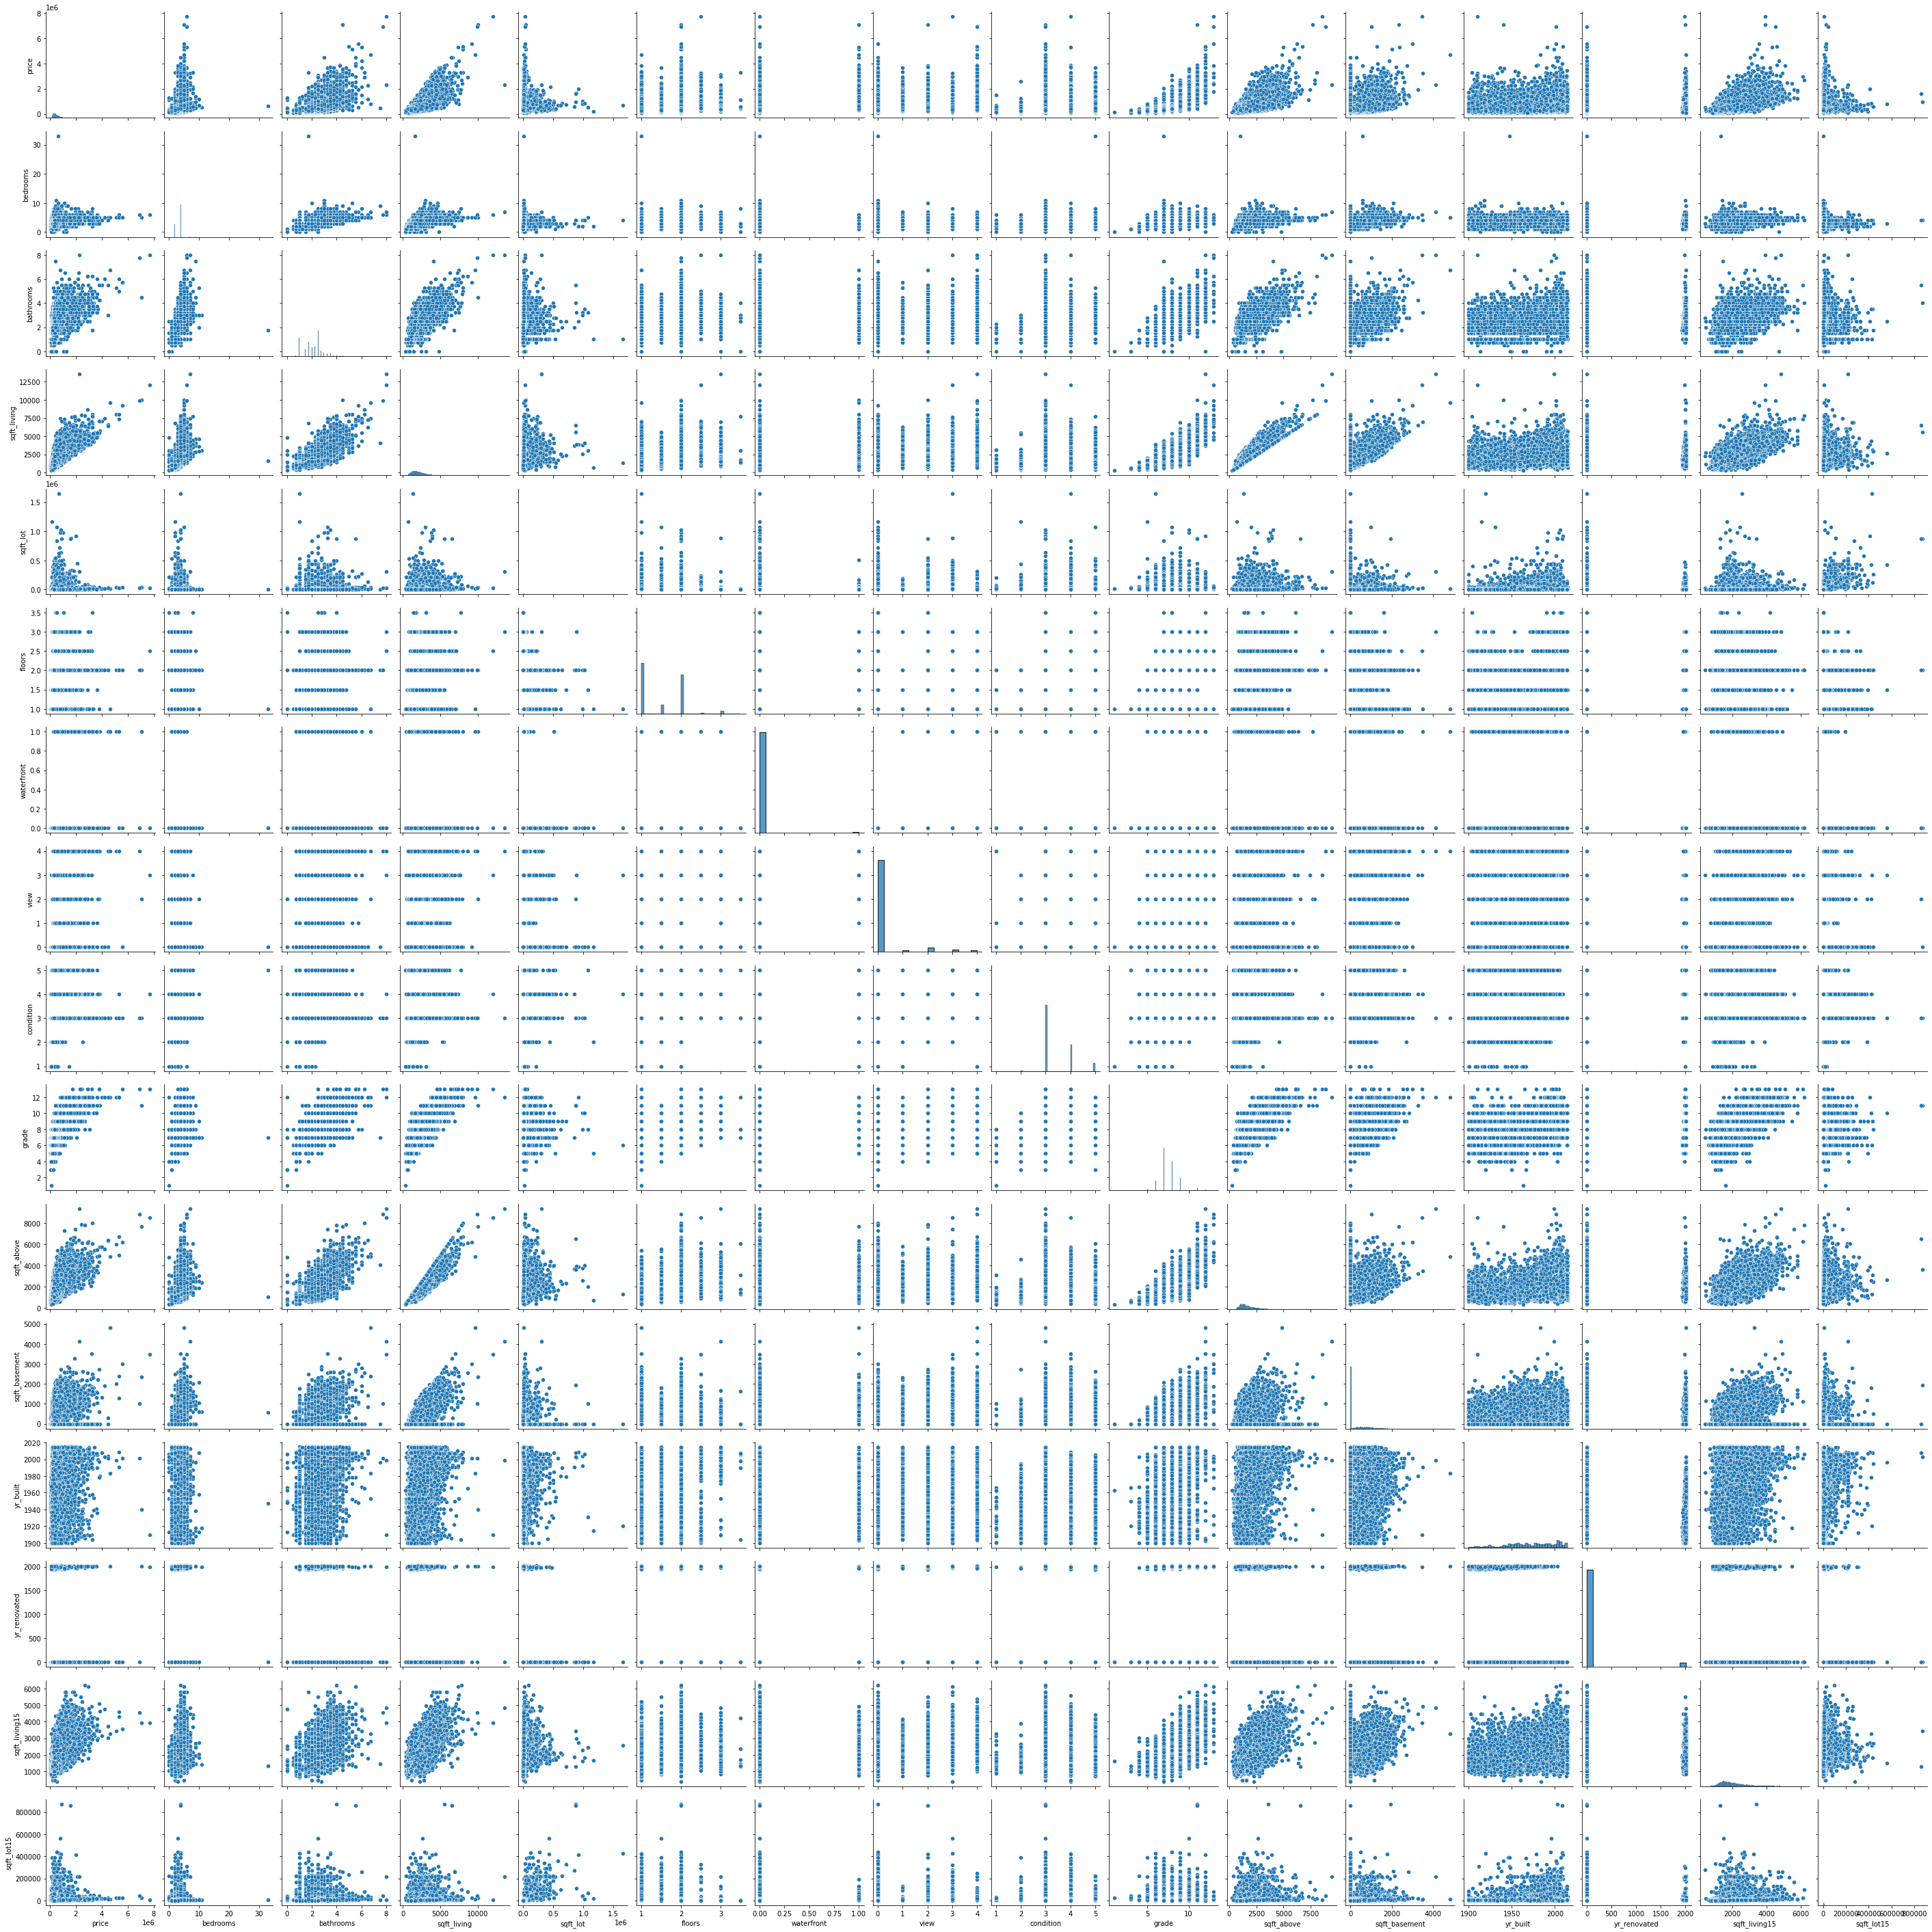

In [38]:
# Apresenta de forma visual a relação entre as colunas
sns.pairplot(house_data);

In [473]:
# Separa as variáveis numéricas da(s) variável(is) categórica(s)
x_numerical = house_data.drop(labels=["waterfront"], axis=1)

# Apenas para avaliar a correlação com menos variáveis
x_numerical1 = house_data.drop(labels=["waterfront", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "view", "condition", "grade"], axis=1)
x_numerical2 = house_data.drop(labels=["waterfront", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"], axis=1)

x_numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503


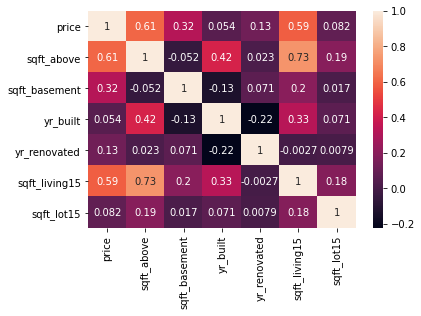

In [474]:
# Avalia a correlação 1ª parte
sns.heatmap(x_numerical1.corr(), annot=True);

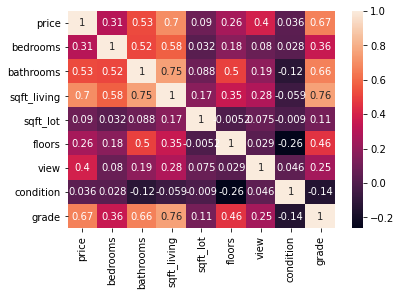

In [475]:
# Avalia a correlação 2ª parte
sns.heatmap(x_numerical2.corr(), annot=True);

# Etapa 05: Tratamento da base de dados

In [476]:
# Remove variáveis não tão significantes
x_numerical = x_numerical.drop(labels=["sqft_lot", "condition"], axis=1)

In [477]:
# Separa variável categórica
x_cat = house_data[['waterfront']]
x_cat.head()

,waterfront
0,0
1,0
2,0
3,0
4,0


In [478]:
# Concatena os valores numéricos e categóricos já tratados
x_all = pd.concat([x_cat, x_numerical], axis=1)
x_all.head()

,waterfront,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0,221900.0,3,1.00,1180,1.0,0,7,1180,0,1955,0,1340,5650
1,0,538000.0,3,2.25,2570,2.0,0,7,2170,400,1951,1991,1690,7639
2,0,180000.0,2,1.00,770,1.0,0,6,770,0,1933,0,2720,8062
3,0,604000.0,4,3.00,1960,1.0,0,7,1050,910,1965,0,1360,5000
4,0,510000.0,3,2.00,1680,1.0,0,8,1680,0,1987,0,1800,7503


In [479]:
# Define nossas variáveis x e variável y
x = x_all.drop(labels=["price"], axis=1)
y = x_all[["price"]]

In [480]:
x.head()

,waterfront,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,0,3,1.00,1180,1.0,0,7,1180,0,1955,0,1340,5650
1,0,3,2.25,2570,2.0,0,7,2170,400,1951,1991,1690,7639
2,0,2,1.00,770,1.0,0,6,770,0,1933,0,2720,8062
3,0,4,3.00,1960,1.0,0,7,1050,910,1965,0,1360,5000
4,0,3,2.00,1680,1.0,0,8,1680,0,1987,0,1800,7503


In [481]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [482]:
# Normaliza valores para que fiquem entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
x = pd.DataFrame(x)
y = pd.DataFrame(y)

# Etapa 06: Configurar base de treinamento

In [483]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.090909,0.12500,0.067170,0.0,0.0,0.500000,0.097588,0.000000,0.478261,0.000000,0.161934,0.005742
1,0.0,0.090909,0.28125,0.172075,0.4,0.0,0.500000,0.206140,0.082988,0.443478,0.988089,0.222165,0.008027
2,0.0,0.060606,0.12500,0.036226,0.0,0.0,0.416667,0.052632,0.000000,0.286957,0.000000,0.399415,0.008513
3,0.0,0.121212,0.37500,0.126038,0.0,0.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.165376,0.004996
4,0.0,0.090909,0.25000,0.104906,0.0,0.0,0.583333,0.152412,0.000000,0.756522,0.000000,0.241094,0.007871


In [484]:
y.head()

,0
0,0.019266
1,0.060721
2,0.013770
3,0.069377
4,0.057049


In [485]:
x.shape

(21613, 13)

In [486]:
y.shape

(21613, 1)

# Etapa 07: Configuração da base de treinamento, validação e teste

In [1064]:
# Divide nossos dados para formação da base de treinamento e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) # 85% base de treinamento e 25% base de teste

In [1065]:
x_train.shape

(16209, 13)

In [1066]:
x_test.shape

(5404, 13)

In [1067]:
y_train.shape

(16209, 1)

In [1068]:
y_test.shape

(5404, 1)

# Etapa 08: Construção e treinamento do modelo

In [1069]:
# Constroi o modelo, utilizando 100 neuronios e mais camadas de aprendizado
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=100, activation='relu', input_shape = [13]))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=100, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 100)               1400      
_________________________________________________________________
dense_208 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_209 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 101       
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


In [1070]:
# Compila o modelo, utilizando uma função de otimização e uma medida de perda
model.compile(optimizer='Adam', loss="mean_squared_error")

In [1071]:
# Configura o modo de treinamento
epochs_hist = model.fit(x_train, y_train, epochs=25, batch_size=100, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 1s 7ms/step - loss: 0.0010 - val_loss: 7.6824e-04
Epoch 2/25
122/122 [==============================] - 0s 3ms/step - loss: 7.5174e-04 - val_loss: 8.0915e-04
Epoch 3/25
122/122 [==============================] - 0s 3ms/step - loss: 7.1653e-04 - val_loss: 8.7457e-04
Epoch 4/25
122/122 [==============================] - 0s 3ms/step - loss: 6.7833e-04 - val_loss: 6.8303e-04
Epoch 5/25
122/122 [==============================] - 0s 3ms/step - loss: 6.5960e-04 - val_loss: 6.9709e-04
Epoch 6/25
122/122 [==============================] - 0s 3ms/step - loss: 6.5730e-04 - val_loss: 7.2059e-04
Epoch 7/25
122/122 [==============================] - 0s 3ms/step - loss: 6.3952e-04 - val_loss: 6.6943e-04
Epoch 8/25
122/122 [==============================] - 0s 3ms/step - loss: 6.1611e-04 - val_loss: 7.3365e-04
Epoch 9/25
122/122 [==============================] - 0s 3ms/step - loss: 6.1005e-04 - val_loss: 6.8876e-04
Epoch 10/25
122/122 [===========

# Etapa 09: Avaliação do modelo

In [1072]:
# Variáveis de perda
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Training and validation loss')

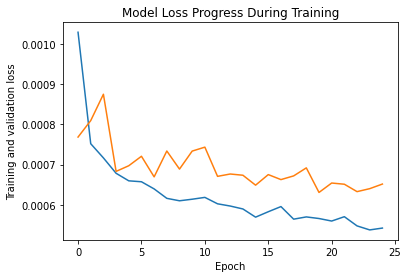

In [1073]:
# Apresenta o gráfico mostrando o progresso da perda durante o treinamento
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and validation loss')

In [1074]:
y_predict = model.predict(x_test)
y_predict

array([[0.05694637],
       [0.05415999],
       [0.11183934],
       ...,
       [0.02566562],
       [0.04196107],
       [0.1117655 ]], dtype=float32)

In [1075]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

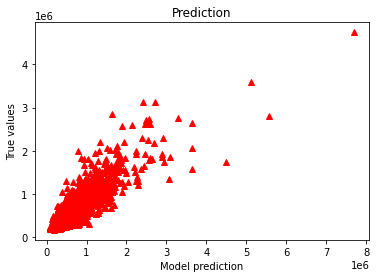

In [1076]:
plt.plot(y_test_orig, y_predict_orig, "^", color="r")
plt.title('Prediction')
plt.xlabel('Model prediction')
plt.ylabel('True values');

In [1077]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [1078]:
k = x_test.shape[1]
k

13

In [1079]:
n = len(x_test)
n

5404

In [1080]:
# Valor 0 = previsões perfeitas
mae = mean_absolute_error(y_test_orig, y_predict_orig)
mae

118511.1248380829

In [1081]:
# Penaliza os outliers, quanto maior os outliers, maior será o erro
mse = mean_squared_error(y_test_orig, y_predict_orig)
mse

34014058004.343994

In [1082]:
# Prevê estimativa de quanto os resíduos estão dispersos
rmse = sqrt(mse)
rmse

184429.00532276367

In [1083]:
# Indica a qualidade do modelo (melhor quanto mais próximo de 1)
# Bons modelos chegam acima de 0.95
r2 = r2_score(y_test_orig, y_predict_orig)
r2

0.7356821042950761

In [1084]:
# Caso o r2 ajustado seja menor que 1 (menor que o r2)
# é porque provavelmente há variáveis insignificantes
r2_ajustado = 1 - (1 - r2) * (n - 1) / (n - k - 1)
r2_ajustado

0.7350446028768638

In [1085]:
print(
    'MAE        : ', mae, 
    '\nMSE        : ', mse, 
    '\nRMSE       : ', rmse, 
    '\nR2         : ', r2, 
    '\nR2 Ajustado: ', r2_ajustado
)

MAE        :  118511.1248380829 
MSE        :  34014058004.343994 
RMSE       :  184429.00532276367 
R2         :  0.7356821042950761 
R2 Ajustado:  0.7350446028768638
